In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load the pre-trained VGG16 model
vgg16_model = load_model(r"C:\Users\K M SASTRY\Desktop\PROJECT\vgg16_model.h5")

# Define data generator
datagen = ImageDataGenerator(rescale=1.0 / 255)

# Path to the training dataset
train_dir = r"K:\PROJECT\ORGANISED DATASET\train"
img_height, img_width = 224, 224
batch_size = 32

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Extract features using the trained VGG16 model
features = vgg16_model.predict(train_generator, verbose=1)
labels = train_generator.classes  # Corresponding labels for the features

# Save the extracted features and labels
np.save(r"C:\Users\K M SASTRY\Desktop\PROJECT\vgg16_features.npy", features)
np.save(r"C:\Users\K M SASTRY\Desktop\PROJECT\vgg16_labels.npy", labels)

Found 6185 images belonging to 2 classes.
194/194 [==============================] - 1329s 7s/step


In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the extracted features and labels
features = np.load(r"C:\Users\K M SASTRY\Desktop\PROJECT\vgg16_features.npy")
labels = np.load(r"C:\Users\K M SASTRY\Desktop\PROJECT\vgg16_labels.npy")

# Reshape the features for SVM input
features = features.reshape(features.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train SVM Classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Save the trained SVM model
joblib.dump(svm_clf, r"C:\Users\K M SASTRY\Desktop\PROJECT\svm_vgg16.pkl")

['C:\\Users\\K M SASTRY\\Desktop\\PROJECT\\svm_vgg16.pkl']

In [3]:
# Evaluate the classifier
y_pred = svm_clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[310 100]
 [ 75 752]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       410
           1       0.88      0.91      0.90       827

    accuracy                           0.86      1237
   macro avg       0.84      0.83      0.84      1237
weighted avg       0.86      0.86      0.86      1237



1/1 [==============================] - 0s 399ms/step


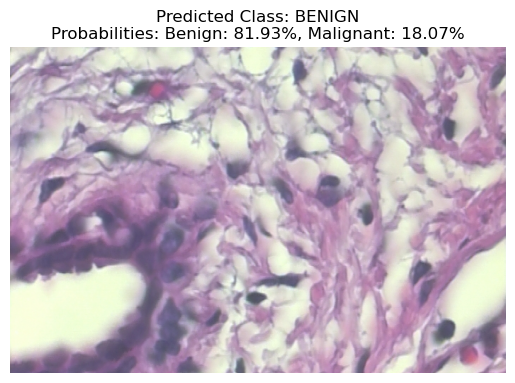

In [4]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained SVM classifier
svm_clf = joblib.load(r"C:\Users\K M SASTRY\Desktop\PROJECT\svm_vgg16.pkl")

# Load and preprocess a single image
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Path to the image to predict
img_path = r"K:\PROJECT\ORGANISED DATASET\test\BENIGN\fibroadenoma\SOB_B_F_14-14134\400X\SOB_B_F-14-14134-400-021.png"

# Preprocess the image
input_image = preprocess_image(img_path, target_size=(img_height, img_width))

# Extract features from the image using the trained VGG16 model
image_features = vgg16_model.predict(input_image)
image_features = image_features.reshape(1, -1)  # Reshape to fit SVM input

# Make a prediction with SVM
prediction = svm_clf.predict(image_features)
prediction_proba = svm_clf.predict_proba(image_features)

# Decode the prediction
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[prediction[0]]

# Format probabilities as percentages
prediction_proba_percent = prediction_proba[0] * 100

# Display the input image and prediction results
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted Class: {predicted_label}\n"
          f"Probabilities: Benign: {prediction_proba_percent[0]:.2f}%, "
          f"Malignant: {prediction_proba_percent[1]:.2f}%")
plt.show()


1/1 [==============================] - 0s 251ms/step


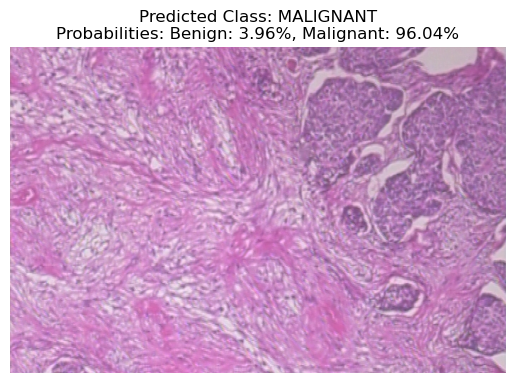

In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained SVM classifier
svm_clf = joblib.load(r"C:\Users\K M SASTRY\Desktop\PROJECT\svm_vgg16.pkl")

# Load and preprocess a single image
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Path to the image to predict
img_path = r"K:\PROJECT\ORGANISED DATASET\test\MALIGNANT\ductal_carcinoma\SOB_M_DC_14-2523\40X\SOB_M_DC-14-2523-40-016.png"

# Preprocess the image
input_image = preprocess_image(img_path, target_size=(img_height, img_width))

# Extract features from the image using the trained VGG16 model
image_features = vgg16_model.predict(input_image)
image_features = image_features.reshape(1, -1)  # Reshape to fit SVM input

# Make a prediction with SVM
prediction = svm_clf.predict(image_features)
prediction_proba = svm_clf.predict_proba(image_features)

# Decode the prediction
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[prediction[0]]

# Format probabilities as percentages
prediction_proba_percent = prediction_proba[0] * 100

# Display the input image and prediction results
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted Class: {predicted_label}\n"
          f"Probabilities: Benign: {prediction_proba_percent[0]:.2f}%, "
          f"Malignant: {prediction_proba_percent[1]:.2f}%")
plt.show()
